In [1]:
!curl -L https://matteobrusa.com/crop.jpg -o crop.jpg
    
    

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  815k  100  815k    0     0   815k      0  0:00:01 --:--:--  0:00:01 1723k


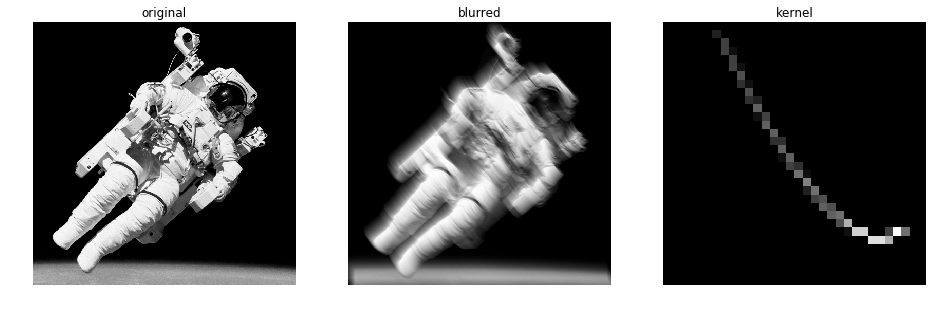

In [3]:
import numpy as np
import scipy
import scipy.signal
from skimage import io, color
from skimage import exposure
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt
from PIL import Image
from pprint import pprint

plt.rcParams["figure.figsize"] = 16, 10
 
size= 512

img = io.imread('crop.jpg')    # Load the image
img = color.rgb2gray(img)       # Convert the image to grayscale (1 channel)

scaled= resize(img, (size, size), mode='constant')
Image.fromarray((scaled*255).astype("uint8"), mode="L").save("scaled.png")

kernel= np.load("swirl.npy")   

# you can use 'valid' instead of 'same', then it will not add zero padding
blurred = scipy.signal.convolve2d(scaled, kernel, 'same')

Image.fromarray((blurred*255).astype("uint8"), mode="L").save("blurred.png")



fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 12))
plt.gray()

for a in (ax[0], ax[1], ax[2]):
       a.axis('off')

ax[0].imshow(scaled)
ax[0].set_title('original')

ax[1].imshow(blurred)
ax[1].set_title('blurred')

ax[2].imshow(kernel)
ax[2].set_title('kernel')

plt.show()
